# Classification - iris Dataset

In [ ]:
#iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris() #https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.datasets.load_iris.html
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
X.shape

(150, 2)

In [ ]:
Y.shape

(150,)

In [ ]:
logreg = LogisticRegression()#(C=1e5)
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
print([x_min, x_max, y_min, y_max])
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))#https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
print(xx.shape)
print(yy.shape)

[3.8, 8.4, 1.5, 4.9]
(171, 231)
(171, 231)


In [ ]:
newxxyy=np.c_[xx.ravel(), yy.ravel()] #https://numpy.org/devdocs/reference/generated/numpy.c_.html#:~:text=numpy.,because%20of%20its%20common%20occurrence.
newxxyy.shape

(39501, 2)

In [ ]:
Z = logreg.predict(newxxyy)
Z.shape

(39501,)

In [ ]:
from sklearn.metrics import classification_report
y_afterpred=logreg.predict(X)
print(classification_report(Y, y_afterpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.73      0.74      0.73        50
           2       0.73      0.72      0.73        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



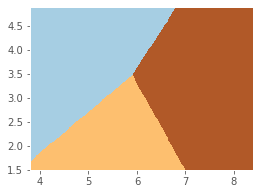

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

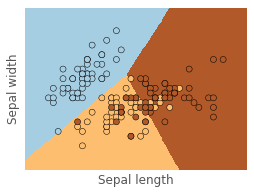

In [ ]:
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knclass = KNeighborsClassifier(3)
# Create an instance of Logistic Regression Classifier and fit the data.
knclass.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
Z = knclass.predict(newxxyy)#mesh grid
Z.shape

(39501,)

In [ ]:
from sklearn.metrics import classification_report
y_afterpred=knclass.predict(X)
print(classification_report(Y, y_afterpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.82      0.72      0.77        50
           2       0.75      0.84      0.79        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



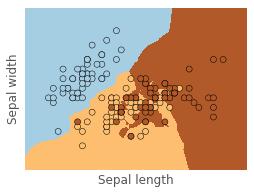

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# BigQuery US Census Income Dataset

## Fetch Data from Big Query

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%load_ext google.colab.data_table

In [ ]:
project_id = 'cmpelkk'
!gcloud config list project

[core]
project (unset)

Your active configuration is: [default]


In [ ]:
!gcloud config set project 'cmpelkk'

Updated property [core/project].


In [ ]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'cmpelkk'
client = bigquery.Client(project=project_id)

In [ ]:
sql = """
SELECT
    *
FROM
    `bigquery-public-data.ml_datasets.census_adult_income`
"""
dfquery = client.query(sql)
df_census=dfquery.to_dataframe()
df_census.head(200)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,74141,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,178215,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,86958,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,176012,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,33,Private,262439,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,>50K
196,31,Private,196788,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
197,47,Private,151267,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,15024,0,40,United-States,>50K
198,35,Private,148903,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,16,United-States,>50K


In [ ]:
print(len(df_census))

32561


In [ ]:
df_census.dtypes

age                   int64
workclass            object
functional_weight     int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
native_country       object
income_bracket       object
dtype: object

## Data Visualization

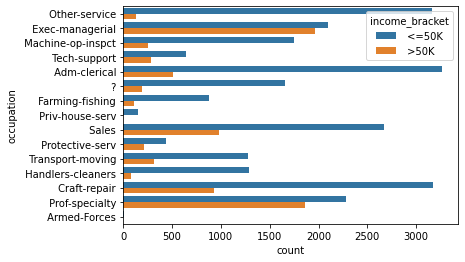

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('dark')
#plt.style.use('dark_background')
#plt.style.use('ggplot')

sns.countplot(y='occupation', hue='income_bracket', data=df_census)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


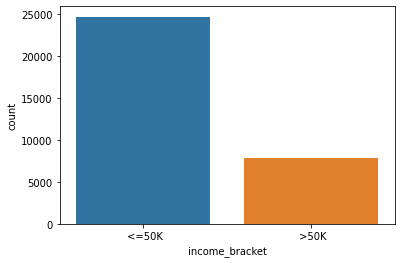

In [ ]:
# Count of >50K & <=50K
sns.countplot(df_census['income_bracket'],label="Count")

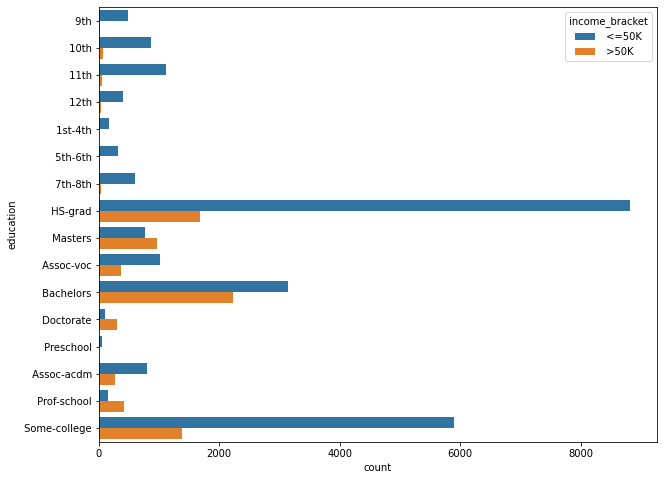

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y='education', hue='income_bracket', data=df_census)

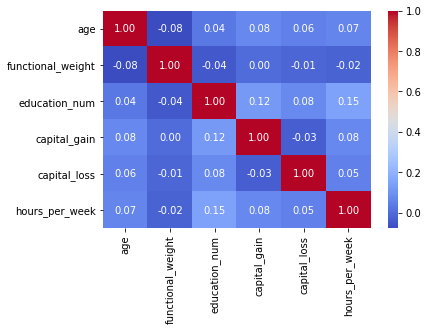

In [ ]:
# Identify Numeric features
numeric_columns = df_census.select_dtypes(['int64']).columns
numeric_columns
# Correlation matrix between numerical values
sns.heatmap(df_census[numeric_columns].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


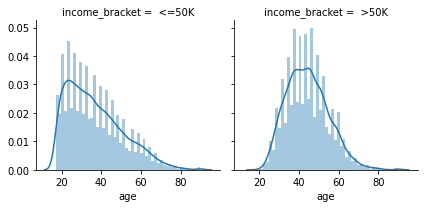

In [ ]:
# Explore Age vs Income
g = sns.FacetGrid(df_census, col='income_bracket')
g = g.map(sns.distplot, "age")

## Feature Extraction
the categorical values themselves are not useful for machine learning; we need a single instance table that contains numeric values. In order to extract this from the dataset, we’ll have to use Scikit-Learn transformers to transform our input dataset into something that can be fit to a model. 
*   encode the categorical labels as numeric data
*   impute missing values with data (or remove)

Sckit-Learn does provide a transformer for converting categorical labels into numeric integers: sklearn.preprocessing.LabelEncoder.
The LabelEncoder has fit and transform methods (as well as a special all-in-one, fit_transform method) that can be used for stateful transformation of a dataset.
The fit method discovers all unique elements in the given vector, orders them lexicographically, and assigns them an integer value. These values are actually the indices of the elements inside the LabelEncoder.classes_ attribute, which can also be used to do a reverse lookup of the class name from the integer value.

In [ ]:
df_census_sex=df_census['sex']
df_census_sex.head()

0     Female
1     Female
2     Female
3     Female
4     Female
Name: sex, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
gender = LabelEncoder()
gender.fit(df_census_sex)
print(gender.classes_)

[' Female' ' Male']


In [ ]:
# transform a simple simulation data
print(gender.transform([
    ' Female', ' Female', ' Male', ' Female', ' Male'
]))

[0 0 1 0 1]


In [ ]:
#In order to create a multicolumn LabelEncoder, we’ll have to extend the TransformerMixin in Scikit-Learn to create a transformer class of our own
from sklearn.base import BaseEstimator, TransformerMixin
class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """
    def __init__(self, columns=None):
        self.columns  = columns
        self.encoders = None
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns
        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self
    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])
        return output

In [ ]:
numeric_columns = df_census.select_dtypes(['int64']).columns
numeric_columns

Index(['age', 'functional_weight', 'education_num', 'capital_gain',
       'capital_loss', 'hours_per_week'],
      dtype='object')

In [ ]:
# Convert integer valued (numeric) columns to floating point
df_census[numeric_columns] = df_census[numeric_columns].astype('float32') # change to float

In [ ]:
df_census.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39.0,Private,297847.0,9th,5.0,Married-civ-spouse,Other-service,Wife,Black,Female,3411.0,0.0,34.0,United-States,<=50K
1,72.0,Private,74141.0,9th,5.0,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0.0,0.0,48.0,United-States,>50K
2,45.0,Private,178215.0,9th,5.0,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0.0,0.0,40.0,United-States,>50K
3,31.0,Private,86958.0,9th,5.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
4,55.0,Private,176012.0,9th,5.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,23.0,United-States,<=50K


In [ ]:
cat_columns = df_census.select_dtypes(['object']).columns
cat_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income_bracket'],
      dtype='object')

In [ ]:
test = LabelEncoder()
test.fit(df_census[cat_columns[0]])
print(test.classes_)

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [ ]:
test.fit(df_census[cat_columns[1]])
print(test.classes_)

[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']


In [ ]:
test.fit(df_census[cat_columns[2]])
print(test.classes_)

[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']


In [ ]:
test.fit(df_census[cat_columns[3]])
print(test.classes_)

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [ ]:
test.fit(df_census[cat_columns[4]])
print(test.classes_)

[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']


In [ ]:
test.fit(df_census[cat_columns[5]])
print(test.classes_)

[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']


In [ ]:
test.fit(df_census[cat_columns[7]])
print(test.classes_)

[' ?' ' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba'
 ' Dominican-Republic' ' Ecuador' ' El-Salvador' ' England' ' France'
 ' Germany' ' Greece' ' Guatemala' ' Haiti' ' Holand-Netherlands'
 ' Honduras' ' Hong' ' Hungary' ' India' ' Iran' ' Ireland' ' Italy'
 ' Jamaica' ' Japan' ' Laos' ' Mexico' ' Nicaragua'
 ' Outlying-US(Guam-USVI-etc)' ' Peru' ' Philippines' ' Poland'
 ' Portugal' ' Puerto-Rico' ' Scotland' ' South' ' Taiwan' ' Thailand'
 ' Trinadad&Tobago' ' United-States' ' Vietnam' ' Yugoslavia']


In [ ]:
encoder = EncodeCategorical(cat_columns)
df_census_encoded = encoder.fit_transform(df_census)
df_census_encoded.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39.0,4,297847.0,6,5.0,2,8,5,2,0,3411.0,0.0,34.0,39,0
1,72.0,4,74141.0,6,5.0,2,4,5,1,0,0.0,0.0,48.0,39,1
2,45.0,4,178215.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39,1
3,31.0,4,86958.0,6,5.0,2,4,5,4,0,0.0,0.0,40.0,39,0
4,55.0,4,176012.0,6,5.0,2,13,5,4,0,0.0,0.0,23.0,39,0


In [ ]:
df_census.isnull().sum()

age                  0
workclass            0
functional_weight    0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income_bracket       0
dtype: int64

In [ ]:
cat_columns[7]

'native_country'

In [ ]:
cat_columns[3]

'occupation'

In [ ]:
cat_columns[0]

'workclass'

In [ ]:
from sklearn.impute import SimpleImputer
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

class ImputeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """
    def __init__(self, columns=None):
        self.columns = columns
        self.imputer = None
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to impute.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns
        # Fit an imputer for each column in the data frame
        self.imputer = SimpleImputer(missing_values=0, strategy='most_frequent')
        self.imputer.fit(data[self.columns])
        return self
    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        output[self.columns] = self.imputer.transform(output[self.columns])
        return output


In [ ]:
imputer = ImputeCategorical(['workclass', 'native_country', 'occupation'])
df_census_encoded = imputer.fit_transform(df_census_encoded)

In [ ]:
df_census_encoded.head(50)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39.0,4,297847.0,6,5.0,2,8,5,2,0,3411.0,0.0,34.0,39,0
1,72.0,4,74141.0,6,5.0,2,4,5,1,0,0.0,0.0,48.0,39,1
2,45.0,4,178215.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39,1
3,31.0,4,86958.0,6,5.0,2,4,5,4,0,0.0,0.0,40.0,39,0
4,55.0,4,176012.0,6,5.0,2,13,5,4,0,0.0,0.0,23.0,39,0
5,30.0,4,61272.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,32,0
6,46.0,5,161386.0,6,5.0,2,1,5,4,0,0.0,0.0,50.0,39,0
7,28.0,4,209801.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39,0
8,37.0,4,171090.0,6,5.0,2,7,5,2,0,0.0,0.0,48.0,39,0
9,40.0,2,183096.0,6,5.0,2,8,5,4,0,0.0,0.0,40.0,41,1


In [ ]:
target=df_census_encoded['income_bracket']
target.head()

0    0
1    1
2    1
3    0
4    0
Name: income_bracket, dtype: int64

In [ ]:
df_census_encoded=df_census_encoded.drop(columns=['income_bracket'])
df_census_encoded.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,4,297847.0,6,5.0,2,8,5,2,0,3411.0,0.0,34.0,39
1,72.0,4,74141.0,6,5.0,2,4,5,1,0,0.0,0.0,48.0,39
2,45.0,4,178215.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39
3,31.0,4,86958.0,6,5.0,2,4,5,4,0,0.0,0.0,40.0,39
4,55.0,4,176012.0,6,5.0,2,13,5,4,0,0.0,0.0,23.0,39


## Peform Classification

Now, let's use the train_test_split method from sklearn to divided the data into training and testing datasets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_census_encoded, target, train_size = 0.7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((22792, 14), (9769, 14), (22792,), (9769,))

In [ ]:
from sklearn.linear_model import LogisticRegression
lgreg=LogisticRegression(max_iter=200)
lgreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=lgreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7463
           1       0.67      0.38      0.49      2306

    accuracy                           0.81      9769
   macro avg       0.75      0.66      0.68      9769
weighted avg       0.79      0.81      0.79      9769



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

roc_auc_score:  0.6611816618532897
f1 score:  0.4851677294150263


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knclassifier=KNeighborsClassifier()
knclassifier.fit(X_train, Y_train)
y_pred = knclassifier.predict(X_test)

#print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      7463
           1       0.53      0.32      0.40      2306

    accuracy                           0.77      9769
   macro avg       0.67      0.62      0.63      9769
weighted avg       0.75      0.77      0.75      9769

roc_auc_score:  0.6171708151657456
f1 score:  0.4008667388949079


## Perform StandardScaler

In [ ]:
X_train.columns

Index(['age', 'workclass', 'functional_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [ ]:
numeric_columns

Index(['age', 'functional_weight', 'education_num', 'capital_gain',
       'capital_loss', 'hours_per_week'],
      dtype='object')

In [ ]:
X_train_c=X_train.copy()

In [ ]:
numeric_features = X_train_c[numeric_columns]
scaler = StandardScaler().fit(numeric_features.values)
trans_features = scaler.transform(numeric_features.values)
trans_features

array([[-1.0680372 ,  2.1832523 , -0.41383013, -0.14568107, -0.2167543 ,
        -0.4367312 ],
       [-0.4106238 , -1.3362346 , -0.02678034, -0.14568107, -0.2167543 ,
        -0.02872779],
       [-0.19148597, -1.0163009 ,  1.134369  , -0.14568107, -0.2167543 ,
         0.37927562],
       ...,
       [ 1.2694327 ,  0.06390695,  2.2955184 , -0.14568107, -0.2167543 ,
        -0.02872779],
       [-1.5793587 , -1.097101  , -1.1879296 , -0.14568107, -0.2167543 ,
        -1.6607413 ],
       [-0.9219453 ,  0.39820102, -0.41383013, -0.14568107, -0.2167543 ,
        -0.02872779]], dtype=float32)

In [ ]:
trans_features.shape

(22792, 6)

In [ ]:
X_train_c[numeric_columns] = trans_features
X_train_c

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
4535,-1.068037,4,2.183252,11,-0.413830,2,5,0,2,1,-0.145681,-0.216754,-0.436731,39
23237,-0.410624,4,-1.336235,15,-0.026780,0,4,4,4,0,-0.145681,-0.216754,-0.028728,39
28178,-0.191486,4,-1.016301,9,1.134369,4,10,1,4,0,-0.145681,-0.216754,0.379276,39
26594,-1.068037,4,1.324768,11,-0.413830,4,7,1,4,1,-0.145681,-0.216754,-0.028728,39
24962,0.685065,4,-0.317953,11,-0.413830,0,14,1,4,1,-0.145681,-0.216754,2.011289,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14080,1.196387,1,1.244336,15,-0.026780,2,1,0,4,1,-0.145681,-0.216754,-0.028728,39
23407,2.511214,4,-0.626708,0,-1.574979,6,8,1,4,0,-0.145681,-0.216754,-2.476748,39
11322,1.269433,1,0.063907,10,2.295518,2,10,0,4,1,-0.145681,-0.216754,-0.028728,39
15258,-1.579359,4,-1.097101,1,-1.187930,4,12,3,4,1,-0.145681,-0.216754,-1.660741,39


In [ ]:
X_test.head(20)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
11358,52.0,7,254285.0,10,16.0,2,10,0,4,1,0.0,1887.0,70.0,11
17632,36.0,4,316298.0,9,13.0,4,13,3,4,1,0.0,0.0,40.0,39
30730,25.0,4,12285.0,15,10.0,4,10,1,0,0,0.0,0.0,20.0,39
10354,38.0,4,156728.0,9,13.0,2,1,0,4,1,0.0,0.0,56.0,39
1035,27.0,4,253814.0,9,13.0,2,13,5,4,0,0.0,0.0,40.0,39
395,46.0,4,202560.0,11,9.0,2,4,5,4,0,0.0,0.0,40.0,39
10203,44.0,5,116358.0,9,13.0,2,12,0,1,1,0.0,0.0,50.0,39
17701,25.0,4,189219.0,9,13.0,4,12,3,4,0,0.0,0.0,40.0,39
12692,57.0,4,183810.0,15,10.0,2,10,0,4,1,0.0,0.0,40.0,39
19470,18.0,4,60981.0,15,10.0,4,12,3,4,0,2176.0,0.0,35.0,39


In [ ]:
X_test_c=X_test.copy()
numeric_features = X_test_c[numeric_columns]
scaler = StandardScaler().fit(numeric_features.values)
trans_features = scaler.transform(numeric_features.values)
X_test_c[numeric_columns] = trans_features
X_test_c

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train_c, Y_train)
y_pred = logreg.predict(X_test_c)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8254
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7463
           1       0.70      0.45      0.55      2306

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.83      0.81      9769

roc_auc_score:  0.6951209662377181
f1 score:  0.5479597244303126


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knclassifier=KNeighborsClassifier()
knclassifier.fit(X_train_c, Y_train)
y_pred = knclassifier.predict(X_test_c)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8249
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7463
           1       0.65      0.57      0.61      2306

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.82      0.82      9769

roc_auc_score:  0.7362884709405952
f1 score:  0.6051234710362335


In [ ]:
#second option
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = StandardScaler()

#X_train_s = pd.DataFrame(X_train, columns = X_train.columns) #pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train_s =pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
#X_test_s = pd.DataFrame(X_test, columns = X_test.columns) #pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test_s = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_s.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,-1.068037,-0.079492,2.183252,0.183017,-0.413830,-0.402800,-0.539309,-0.896765,-1.976675,0.699280,-0.145681,-0.216754,-0.436731,0.260774
1,-0.410624,-0.079492,-1.336235,1.215651,-0.026780,-1.734965,-0.791187,1.592919,0.391387,-1.430043,-0.145681,-0.216754,-0.028728,0.260774
2,-0.191486,-0.079492,-1.016301,-0.333300,1.134369,0.929365,0.720084,-0.274344,0.391387,-1.430043,-0.145681,-0.216754,0.379276,0.260774
3,-1.068037,-0.079492,1.324768,0.183017,-0.413830,0.929365,-0.035552,-0.274344,0.391387,0.699280,-0.145681,-0.216754,-0.028728,0.260774
4,0.685065,-0.079492,-0.317953,0.183017,-0.413830,-1.734965,1.727598,-0.274344,0.391387,0.699280,-0.145681,-0.216754,2.011289,0.260774


In [ ]:
X_test_s.head(20)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.977249,2.631400,0.611304,-0.075141,2.295518,-0.402800,0.720084,-0.896765,0.391387,0.699280,-0.145681,4.456273,2.419293,-4.348800
1,-0.191486,-0.079492,1.196798,-0.333300,1.134369,0.929365,1.475719,0.970498,0.391387,0.699280,-0.145681,-0.216754,-0.028728,0.260774
2,-0.994991,-0.079492,-1.673531,1.215651,-0.026780,0.929365,0.720084,-0.274344,-4.344736,-1.430043,-0.145681,-0.216754,-1.660741,0.260774
3,-0.045394,-0.079492,-0.309777,-0.333300,1.134369,-0.402800,-1.546822,-0.896765,0.391387,0.699280,-0.145681,-0.216754,1.276883,0.260774
4,-0.848899,-0.079492,0.606857,-0.333300,1.134369,-0.402800,1.475719,2.215340,0.391387,-1.430043,-0.145681,-0.216754,-0.028728,0.260774
5,0.538973,-0.079492,0.122944,0.183017,-0.413830,-0.402800,-0.791187,2.215340,0.391387,-1.430043,-0.145681,-0.216754,-0.028728,0.260774
6,0.392881,0.824139,-0.690929,-0.333300,1.134369,-0.402800,1.223841,-0.896765,-3.160705,0.699280,-0.145681,-0.216754,0.787279,0.260774
7,-0.994991,-0.079492,-0.003014,-0.333300,1.134369,0.929365,1.223841,0.970498,0.391387,-1.430043,-0.145681,-0.216754,-0.028728,0.260774
8,1.342479,-0.079492,-0.054083,1.215651,-0.026780,-0.402800,0.720084,-0.896765,0.391387,0.699280,-0.145681,-0.216754,-0.028728,0.260774
9,-1.506313,-0.079492,-1.213769,1.215651,-0.026780,0.929365,1.223841,0.970498,0.391387,-1.430043,0.148440,-0.216754,-0.436731,0.260774


In [ ]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train_s, Y_train)
y_pred = logreg.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8255
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7463
           1       0.70      0.45      0.55      2306

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.83      0.81      9769

roc_auc_score:  0.6960869343400847
f1 score:  0.5495376486129459


## Other Classifiers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knclassifier=KNeighborsClassifier()
knclassifier.fit(X_train_s, Y_train)
y_pred = knclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8270
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7463
           1       0.65      0.58      0.61      2306

    accuracy                           0.83      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769

roc_auc_score:  0.7412912955140707
f1 score:  0.6123853211009174


In [ ]:
from sklearn.svm import SVC
svcclassifier=SVC(kernel="linear", C=0.025)
svcclassifier.fit(X_train_c, Y_train)
y_pred = svcclassifier.predict(X_test_c)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8176
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7463
           1       0.79      0.31      0.44      2306

    accuracy                           0.82      9769
   macro avg       0.81      0.64      0.67      9769
weighted avg       0.81      0.82      0.79      9769

roc_auc_score:  0.642084064559488
f1 score:  0.44485981308411215


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decclassifier=DecisionTreeClassifier(max_depth=5)
decclassifier.fit(X_train_s, Y_train)
y_pred = decclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8512
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7463
           1       0.77      0.53      0.63      2306

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769

roc_auc_score:  0.7409211549454906
f1 score:  0.627942681678608


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
randomclassifier=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
randomclassifier.fit(X_train_s, Y_train)
y_pred = randomclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8209
              precision    recall  f1-score   support

           0       0.82      0.99      0.89      7463
           1       0.87      0.28      0.43      2306

    accuracy                           0.82      9769
   macro avg       0.84      0.64      0.66      9769
weighted avg       0.83      0.82      0.78      9769

roc_auc_score:  0.6352382653527858
f1 score:  0.4277305428384564


In [ ]:
adaclassifier=AdaBoostClassifier()
adaclassifier.fit(X_train_s, Y_train)
y_pred = adaclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8613
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7463
           1       0.76      0.60      0.67      2306

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769

roc_auc_score:  0.7716762626238562
f1 score:  0.6719922536916001


In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussianclassifier=GaussianNB()
gaussianclassifier.fit(X_train_s, Y_train)
y_pred = gaussianclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8067
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7463
           1       0.67      0.35      0.46      2306

    accuracy                           0.81      9769
   macro avg       0.75      0.65      0.67      9769
weighted avg       0.79      0.81      0.78      9769

roc_auc_score:  0.6492160690048936
f1 score:  0.4614945807187678


In [ ]:
from sklearn.neural_network import MLPClassifier
mlpclassifier=MLPClassifier(max_iter=300)#(alpha=1, max_iter=1000)
mlpclassifier.fit(X_train_s, Y_train)
y_pred = mlpclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8501
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7463
           1       0.71      0.61      0.66      2306

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.85      9769

roc_auc_score:  0.7685687669461335
f1 score:  0.659217877094972


In [ ]:
from sklearn.neural_network import MLPClassifier #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
mlpclassifier=MLPClassifier(hidden_layer_sizes=50, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='adaptive', max_iter=1000)#(alpha=1, max_iter=1000)
mlpclassifier.fit(X_train_s, Y_train)
y_pred = mlpclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8497
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7463
           1       0.71      0.61      0.66      2306

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.85      9769

roc_auc_score:  0.7656038654529155
f1 score:  0.6557223264540337


In [ ]:
from sklearn.neural_network import MLPClassifier #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
mlpclassifier=MLPClassifier(hidden_layer_sizes=200, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='adaptive', max_iter=1000)#(alpha=1, max_iter=1000)
mlpclassifier.fit(X_train_s, Y_train)
y_pred = mlpclassifier.predict(X_test_s)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

Logistic Regression accuracy score with all the features: 0.8417
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7463
           1       0.67      0.64      0.66      2306

    accuracy                           0.84      9769
   macro avg       0.78      0.77      0.78      9769
weighted avg       0.84      0.84      0.84      9769

roc_auc_score:  0.773413163221299
f1 score:  0.6576616474756423


# Others

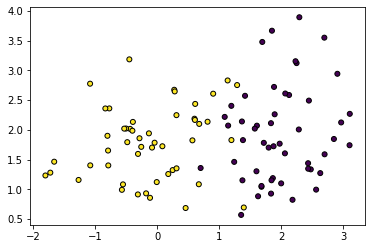

In [ ]:
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

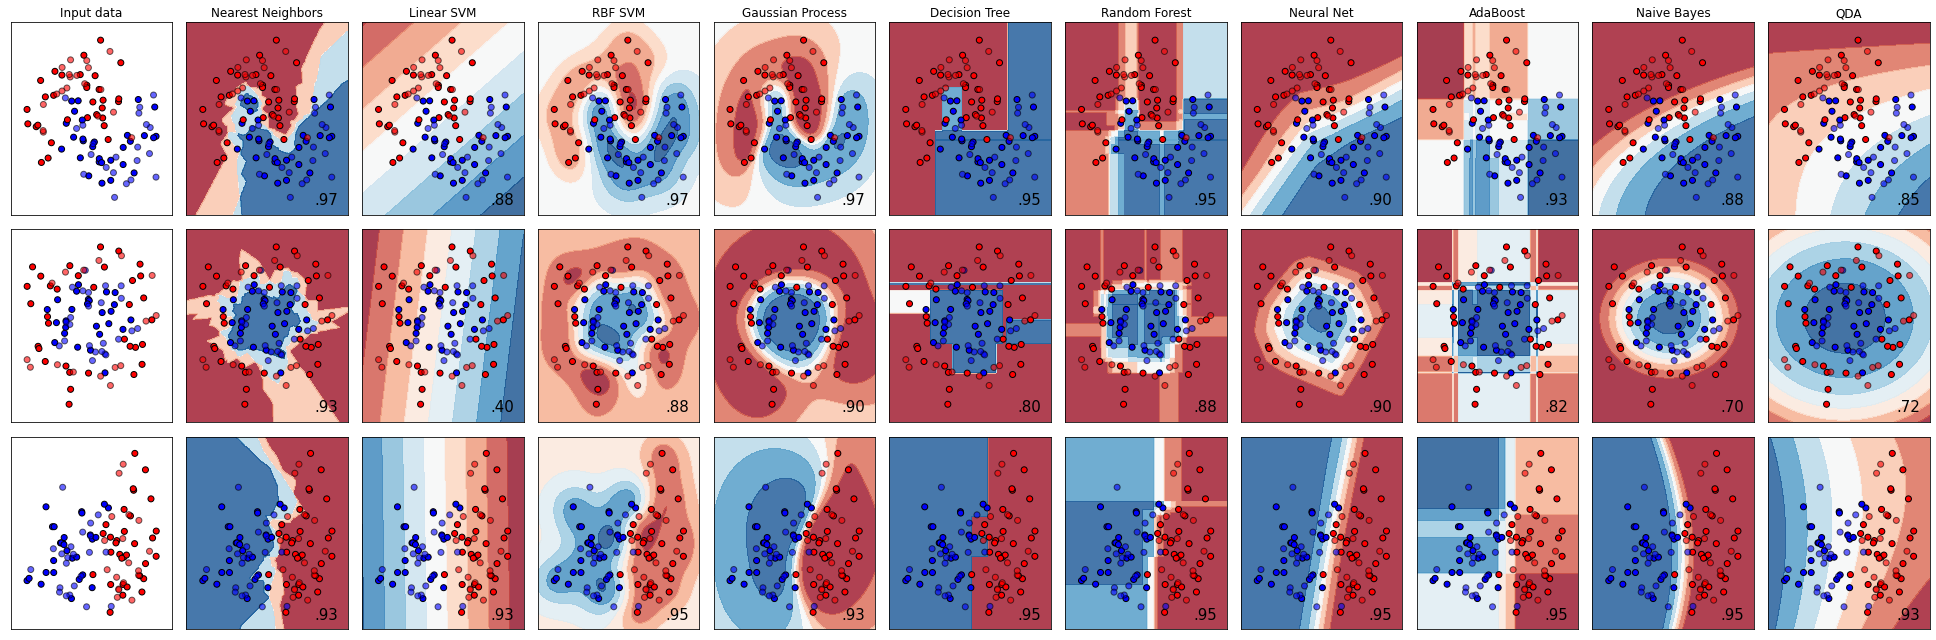

In [ ]:


datasets = [make_moons(noise=0.3, random_state=0), #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.950498 (0.032734)
LDA: 0.957475 (0.031541)
KNN: 0.941196 (0.037117)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

CART: 0.915559 (0.027839)
NB: 0.936822 (0.034582)
SVM: 0.915504 (0.048157)


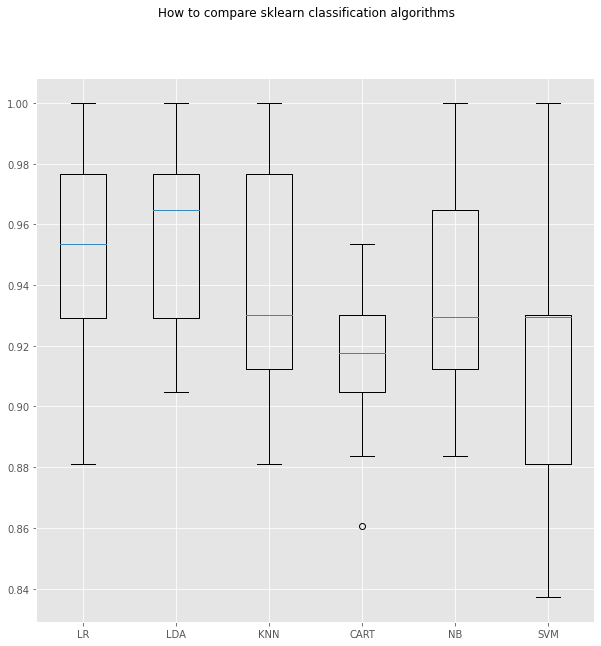

In [ ]:
# load libraries
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def compareclassifier():
    # load datasets
    seed = 42
    dataset = datasets.load_breast_cancer()
    X = dataset.data; y = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    kfold = model_selection.KFold(n_splits=10, random_state=seed)

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    
    # evaluate each model
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
	     kfold = model_selection.KFold(n_splits=10, random_state=seed)
	     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	     results.append(cv_results)
	     names.append(name)
	     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	     print(msg)
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('How to compare sklearn classification algorithms')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
compareclassifier()